In [3]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import os
PROJ_ROOT = os.path.abspath(os.path.join(os.pardir))
print(PROJ_ROOT)

/home/neha/Desktop/code/ML/Kaggle/googleanalytics


In [4]:
train = pd.read_csv('../data/processed/train_flat.csv',dtype={'fullVisitorId': 'str'})
test = pd.read_csv('../data/processed/test_flat.csv', dtype={'fullVisitorId': 'str'})

/home/neha/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (49) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 903653 entries, 0 to 903652
Data columns (total 55 columns):
channelGrouping                                      903653 non-null object
date                                                 903653 non-null int64
fullVisitorId                                        903653 non-null object
sessionId                                            903653 non-null object
socialEngagementType                                 903653 non-null object
visitId                                              903653 non-null int64
visitNumber                                          903653 non-null int64
visitStartTime                                       903653 non-null int64
device.browser                                       903653 non-null object
device.browserSize                                   903653 non-null object
device.browserVersion                                903653 non-null object
device.deviceCategory                                9036

In [6]:
train.shape

(903653, 55)

In [7]:
test.shape

(804684, 53)

In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 804684 entries, 0 to 804683
Data columns (total 53 columns):
channelGrouping                                      804684 non-null object
date                                                 804684 non-null int64
fullVisitorId                                        804684 non-null object
sessionId                                            804684 non-null object
socialEngagementType                                 804684 non-null object
visitId                                              804684 non-null int64
visitNumber                                          804684 non-null int64
visitStartTime                                       804684 non-null int64
device.browser                                       804684 non-null object
device.browserSize                                   804684 non-null object
device.browserVersion                                804684 non-null object
device.deviceCategory                                8046

### Columns that are not in test set

In [9]:
set(train.columns) - set(test.columns)

{'totals.transactionRevenue', 'trafficSource.campaignCode'}

### Unique users

In [10]:
train.fullVisitorId.nunique()

714167

In [11]:
test.fullVisitorId.nunique()

617242

In [12]:
# common people between train and test
len(set(train.fullVisitorId.unique()).intersection(set(test.fullVisitorId.unique())))

7679

In [13]:
set(train.fullVisitorId.unique()).intersection(set(test.fullVisitorId.unique()))

{'8508021974399453870',
 '47558627041340649',
 '7487437966424965141',
 '5614034160184664215',
 '9545953759148892629',
 '8043224042883197963',
 '8049395861293507249',
 '8538839072033447544',
 '263271496955414005',
 '6907461155252290203',
 '9390512086637986236',
 '9887702970343121538',
 '8999692356305160170',
 '3764844384611505375',
 '5887343445928669154',
 '2736852804034172807',
 '4726503575822831138',
 '1910027836147762390',
 '0287505466547576258',
 '5443486905524718840',
 '5846679615983704431',
 '5359326636811010453',
 '4955298442921379457',
 '0150366012047012513',
 '4578440985178008822',
 '5322381541505442034',
 '6692690825454739415',
 '7818875703699228375',
 '6804323739779390278',
 '2704861775972081631',
 '007044482384606354',
 '2795375264111821281',
 '2456425924123559916',
 '7959379868377759113',
 '8844175543445282880',
 '4602163433106773181',
 '3668422372938801448',
 '688706925177557769',
 '5088884708613400368',
 '9249007103274158947',
 '3435571918295914076',
 '8666362407502673498

In [14]:
train[train.fullVisitorId == '2160108665395830223']

,channelGrouping,date,fullVisitorId,sessionId,socialEngagementType,visitId,visitNumber,visitStartTime,device.browser,device.browserSize,...,trafficSource.adwordsClickInfo.isVideoAd,trafficSource.adwordsClickInfo.page,trafficSource.adwordsClickInfo.slot,trafficSource.campaign,trafficSource.campaignCode,trafficSource.isTrueDirect,trafficSource.keyword,trafficSource.medium,trafficSource.referralPath,trafficSource.source
223139,Organic Search,20170724,2160108665395830223,2160108665395830223_1500902953,Not Socially Engaged,1500902953,3,1500902953,Chrome,not available in demo dataset,...,NaN,NaN,NaN,(not set),NaN,True,(not provided),organic,NaN,google
301987,Organic Search,20170723,2160108665395830223,2160108665395830223_1500862781,Not Socially Engaged,1500862781,2,1500862781,Chrome,not available in demo dataset,...,NaN,NaN,NaN,(not set),NaN,True,(not provided),organic,NaN,google
502987,Organic Search,20170722,2160108665395830223,2160108665395830223_1500776661,Not Socially Engaged,1500776661,1,1500776661,Chrome,not available in demo dataset,...,NaN,NaN,NaN,(not set),NaN,NaN,(not provided),organic,NaN,google


In [15]:
test[test.fullVisitorId == '2160108665395830223']

,channelGrouping,date,fullVisitorId,sessionId,socialEngagementType,visitId,visitNumber,visitStartTime,device.browser,device.browserSize,...,trafficSource.adwordsClickInfo.gclId,trafficSource.adwordsClickInfo.isVideoAd,trafficSource.adwordsClickInfo.page,trafficSource.adwordsClickInfo.slot,trafficSource.campaign,trafficSource.isTrueDirect,trafficSource.keyword,trafficSource.medium,trafficSource.referralPath,trafficSource.source
496171,Organic Search,20170803,2160108665395830223,2160108665395830223_1501796659,Not Socially Engaged,1501796659,7,1501796659,Chrome,not available in demo dataset,...,NaN,NaN,NaN,NaN,(not set),True,(not provided),organic,NaN,google
497030,Organic Search,20170803,2160108665395830223,2160108665395830223_1501793513,Not Socially Engaged,1501793513,6,1501793513,Chrome,not available in demo dataset,...,NaN,NaN,NaN,NaN,(not set),True,(not provided),organic,NaN,google
497124,Organic Search,20170803,2160108665395830223,2160108665395830223_1501770135,Not Socially Engaged,1501770135,4,1501770135,Chrome,not available in demo dataset,...,NaN,NaN,NaN,NaN,(not set),True,(not provided),organic,NaN,google
497146,Organic Search,20170803,2160108665395830223,2160108665395830223_1501782881,Not Socially Engaged,1501782881,5,1501782881,Chrome,not available in demo dataset,...,NaN,NaN,NaN,NaN,(not set),True,(not provided),organic,NaN,google


### Target variable 

In [16]:
train["totals.transactionRevenue"] = train["totals.transactionRevenue"].astype('float')
train[train['totals.transactionRevenue'] > 0.0].shape[0]/train.shape[0]

0.0127427231470487

In [17]:
train[train['totals.transactionRevenue'] > 0.0].shape[0]

11515

In [18]:
train[train['totals.transactionRevenue'] > 0.0].fullVisitorId.nunique()/train.fullVisitorId.nunique()

0.013996726255903731

In [19]:
train[train['totals.transactionRevenue'] > 0.0].fullVisitorId.nunique()

9996

In [20]:
train['totals.transactionRevenue'].describe()

count    1.151500e+04
mean     1.337448e+08
std      4.482852e+08
min      1.000000e+04
25%      2.493000e+07
50%      4.945000e+07
75%      1.076550e+08
max      2.312950e+10
Name: totals.transactionRevenue, dtype: float64

/home/neha/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


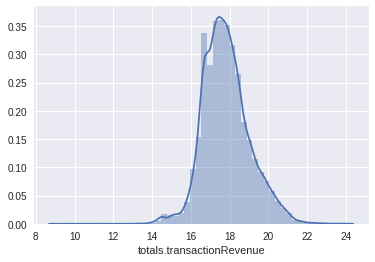

In [21]:
sns.distplot(np.log(train[~train['totals.transactionRevenue'].isnull()]['totals.transactionRevenue']))

In [22]:
train['totals.transactionRevenue'].quantile(0.75)

107655000.0

In [23]:
train['totals.transactionRevenue'].quantile(0.95)

492575999.99999785

### columns with only one unique value

In [24]:
const_cols = [c for c in train.columns if train[c].nunique(dropna=False)==1 ]
const_cols

['socialEngagementType',
 'device.browserSize',
 'device.browserVersion',
 'device.flashVersion',
 'device.language',
 'device.mobileDeviceBranding',
 'device.mobileDeviceInfo',
 'device.mobileDeviceMarketingName',
 'device.mobileDeviceModel',
 'device.mobileInputSelector',
 'device.operatingSystemVersion',
 'device.screenColors',
 'device.screenResolution',
 'geoNetwork.cityId',
 'geoNetwork.latitude',
 'geoNetwork.longitude',
 'geoNetwork.networkLocation',
 'totals.visits',
 'trafficSource.adwordsClickInfo.criteriaParameters']

In [78]:
len(const_cols)

19

In [66]:
train['device.mobileDeviceModel'].unique()

array(['not available in demo dataset'], dtype=object)

In [67]:
train['geoNetwork.cityId'].unique()

array(['not available in demo dataset'], dtype=object)

In [26]:
train.nunique(dropna=False)

channelGrouping                                           8
date                                                    366
fullVisitorId                                        714167
sessionId                                            902755
socialEngagementType                                      1
visitId                                              886303
visitNumber                                             384
visitStartTime                                       887159
device.browser                                           54
device.browserSize                                        1
device.browserVersion                                     1
device.deviceCategory                                     3
device.flashVersion                                       1
device.isMobile                                           2
device.language                                           1
device.mobileDeviceBranding                               1
device.mobileDeviceInfo                 

In [27]:
train.columns[train.nunique(dropna=False) > 1]

Index(['channelGrouping', 'date', 'fullVisitorId', 'sessionId', 'visitId',
       'visitNumber', 'visitStartTime', 'device.browser',
       'device.deviceCategory', 'device.isMobile', 'device.operatingSystem',
       'geoNetwork.city', 'geoNetwork.continent', 'geoNetwork.country',
       'geoNetwork.metro', 'geoNetwork.networkDomain', 'geoNetwork.region',
       'geoNetwork.subContinent', 'totals.bounces', 'totals.hits',
       'totals.newVisits', 'totals.pageviews', 'totals.transactionRevenue',
       'trafficSource.adContent',
       'trafficSource.adwordsClickInfo.adNetworkType',
       'trafficSource.adwordsClickInfo.gclId',
       'trafficSource.adwordsClickInfo.isVideoAd',
       'trafficSource.adwordsClickInfo.page',
       'trafficSource.adwordsClickInfo.slot', 'trafficSource.campaign',
       'trafficSource.campaignCode', 'trafficSource.isTrueDirect',
       'trafficSource.keyword', 'trafficSource.medium',
       'trafficSource.referralPath', 'trafficSource.source'],
      dty

In [28]:
len(train.columns[train.nunique(dropna=False) > 1])

36

In [75]:
len(train.columns)

55

In [30]:
train.channelGrouping.value_counts()

Organic Search    381561
Social            226117
Direct            143026
Referral          104838
Paid Search        25326
Affiliates         16403
Display             6262
(Other)              120
Name: channelGrouping, dtype: int64

/home/neha/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


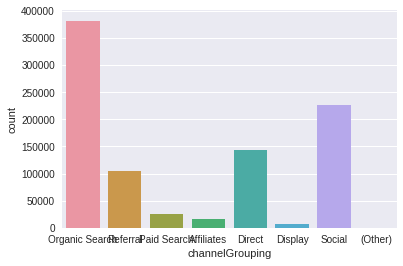

In [31]:
sns.countplot(train.channelGrouping)

/home/neha/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


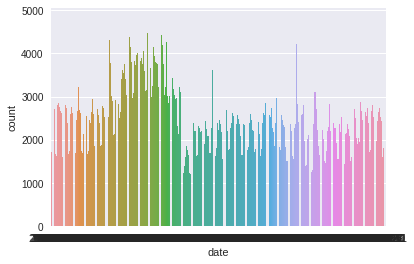

In [33]:
sns.countplot(train.date)

In [35]:
train.date.min()

20160801

In [36]:
train.date.max()

20170801

In [37]:
test.date.min()

20170802

In [38]:
test.date.max()

20180430

In [39]:
# train data is from 1st Aug 2016 - 1st Aug 2017
# test data is from 2nd Aug 2017 - 30 Apr 2018

/home/neha/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


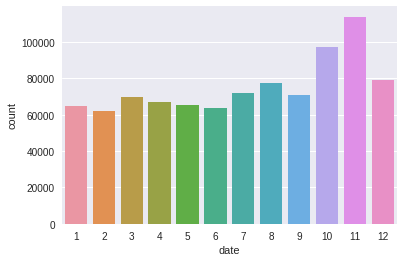

In [41]:
sns.countplot(train.date.apply(lambda x: (x%10000)//100))

/home/neha/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


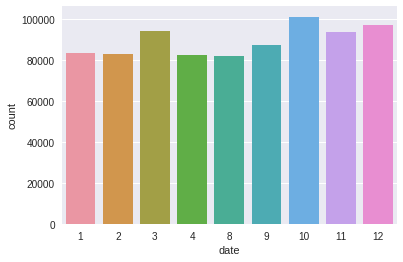

In [42]:
sns.countplot(test.date.apply(lambda x: (x%10000)//100))

In [44]:
train.sessionId.nunique()

902755

In [92]:
train.shape[0]

903653